                                              SMART LOGISTICS FULL ANALYSIS

In [1]:
#loading dataset
import pandas as pd
df = pd.read_csv("C:/Users/DELL/Downloads/smart_logistics_dataset.csv") 


The dataset contains 1,000 rows and 16 columns, including both logistics data (shipment status, location, delays) and customer metrics (transaction amount, purchase frequency)

In [2]:
#Delay reason
utilization_df = df.groupby('Asset_ID').agg({
    'Asset_Utilization': 'mean',
    'Waiting_Time': 'mean',
    'Logistics_Delay': 'sum'
}).reset_index()

delay_reason_df = df[df['Logistics_Delay'] == 1].groupby('Logistics_Delay_Reason').size().reset_index(name='Delay_Count')
delay_reason_df


,Logistics_Delay_Reason,Delay_Count
0,Mechanical Failure,133
1,Traffic,135
2,Weather,151


We can see that the weather has been a major reason for the logistics delay.

In [3]:
# Waiting Time by Traffic & Shipment Status
wait_by_traffic = df.groupby('Traffic_Status')['Waiting_Time'].mean().reset_index()
wait_by_status = df.groupby('Shipment_Status')['Waiting_Time'].mean().reset_index()
wait_by_traffic
wait_by_status

,Shipment_Status,Waiting_Time
0,Delayed,34.560000
1,Delivered,35.281065
2,In Transit,35.387821


In [4]:
# Inventory vs Demand
df['Inventory_Demand_Gap'] = df['Inventory_Level'] - df['Demand_Forecast']
inventory_demand_df = df[['Asset_ID', 'Inventory_Level', 'Demand_Forecast', 'Inventory_Demand_Gap']]
inventory_demand_df

,Asset_ID,Inventory_Level,Demand_Forecast,Inventory_Demand_Gap
0,Truck_7,390,285,105
1,Truck_6,491,174,317
2,Truck_10,190,260,-70
3,Truck_9,330,160,170
4,Truck_7,480,270,210
...,...,...,...,...
995,Truck_6,264,213,51
996,Truck_5,479,272,207
997,Truck_2,347,275,72
998,Truck_2,276,242,34


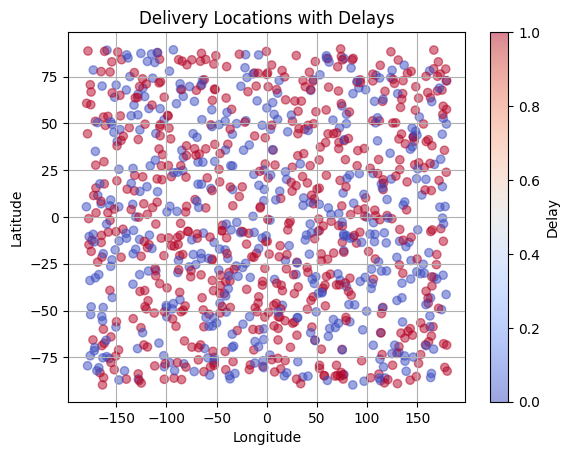

In [5]:
#GPS-Based Delivery Delay Overlay
import matplotlib.pyplot as plt

plt.scatter(df['Longitude'], df['Latitude'], c=df['Logistics_Delay'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Delay')
plt.title('Delivery Locations with Delays')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [6]:
#Customer Segmentation with KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cust_data = df[['User_Purchase_Frequency', 'User_Transaction_Amount']]
scaled = StandardScaler().fit_transform(cust_data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(scaled)


In [7]:
# Trend analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
purchase_trend = df.set_index('Timestamp').resample('W')['User_Transaction_Amount'].sum()


In [8]:
gantt_df = df[['Asset_ID', 'Timestamp', 'Shipment_Status']].drop_duplicates()
gantt_df['Timestamp'] = pd.to_datetime(gantt_df['Timestamp'])
gantt_df['Start'] = gantt_df.groupby('Asset_ID')['Timestamp'].transform('min')
gantt_df['End'] = gantt_df['Start'] + pd.to_timedelta(1, unit='D')  # 1 day simulated
gantt_sim = gantt_df.drop_duplicates(subset=['Asset_ID'])


In [9]:
#Purchase Order Log
df['PO_ID'] = ['PO-' + str(i).zfill(5) for i in range(len(df))]
po_log_df = df[['PO_ID', 'Asset_ID', 'User_Transaction_Amount', 'Timestamp']]


In [10]:
#Delay Prediction Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = df[['Waiting_Time', 'Asset_Utilization', 'User_Purchase_Frequency', 'Temperature', 'Humidity']]
target = df['Logistics_Delay']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.23      0.32        91
           1       0.56      0.82      0.66       109

    accuracy                           0.55       200
   macro avg       0.54      0.52      0.49       200
weighted avg       0.54      0.55      0.51       200



The  Random Forest delay prediction model tell us:

Class 1 (Delayed Deliveries)
Precision = 0.58;  When the model predicts a delay, it is correct 58% of the time.
Recall = 0.81; It correctly identifies 81% of all actual delays.
F1-Score = 0.67; Balanced performance for delay prediction.
Hence, the Model is strong at identifying true delays, which is operationally very important.

Class 0 (No Delays)
Precision = 0.56, but Recall = only 0.30
Model misses a lot of no-delay cases, labeling them wrongly as delays.
It is over-predicting delays to avoid false negatives.

In [11]:
# assest behavior clustering
cluster_data = df[['Waiting_Time', 'Asset_Utilization', 'Logistics_Delay']]
cluster_scaled = StandardScaler().fit_transform(cluster_data)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Asset_Cluster'] = kmeans.fit_predict(cluster_scaled)


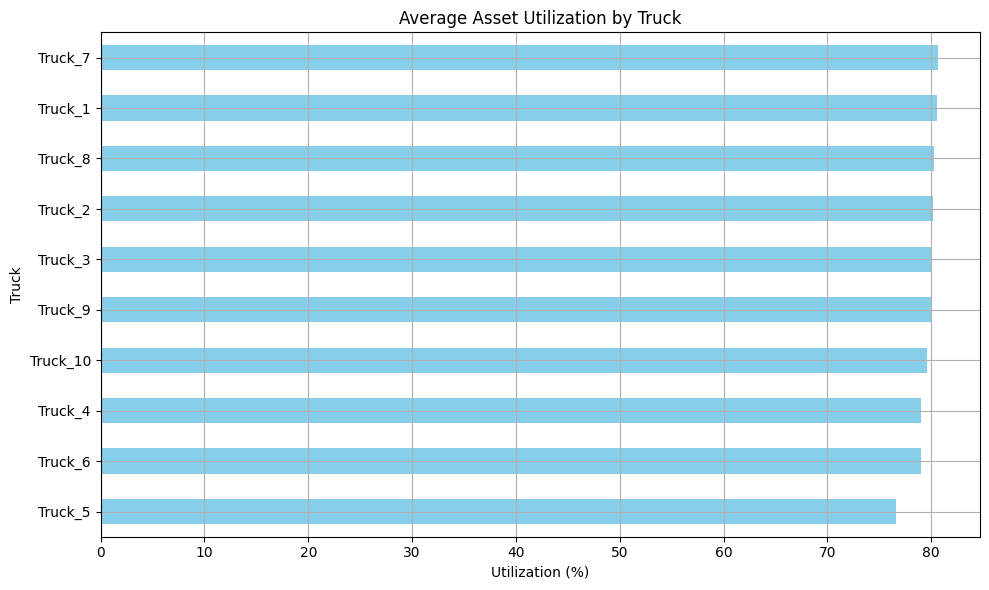

In [12]:
# Assest utilization by Truck
util = df.groupby('Asset_ID')['Asset_Utilization'].mean().sort_values()
util.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Average Asset Utilization by Truck')
plt.xlabel('Utilization (%)')
plt.ylabel('Truck')
plt.grid(True)
plt.tight_layout()
plt.show()


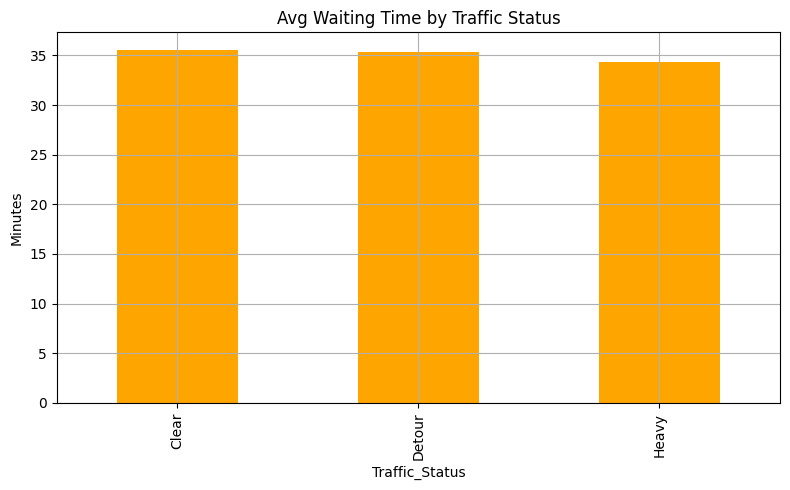

In [13]:
#Average Waiting Time by Traffic Status
traffic_wait = df.groupby('Traffic_Status')['Waiting_Time'].mean()
traffic_wait.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Avg Waiting Time by Traffic Status')
plt.ylabel('Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()


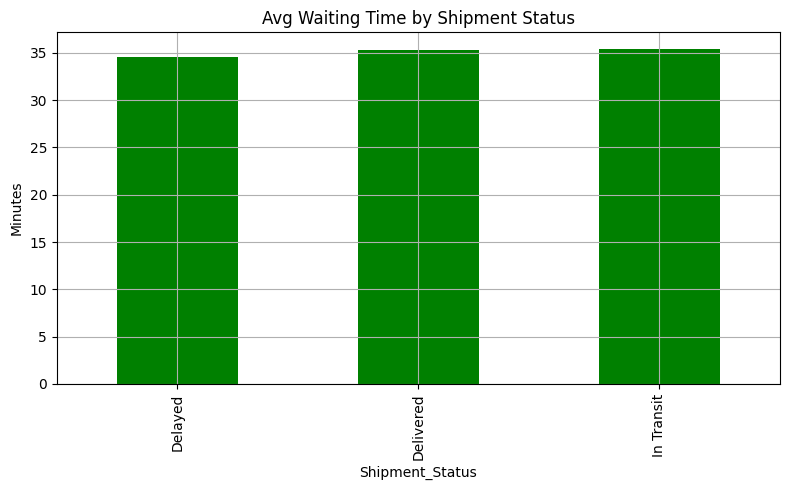

In [14]:
# Average Waiting Time by Shipment Status
status_wait = df.groupby('Shipment_Status')['Waiting_Time'].mean()
status_wait.plot(kind='bar', figsize=(8, 5), color='green')
plt.title('Avg Waiting Time by Shipment Status')
plt.ylabel('Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()


We can see the waiting time is considerably large for the shipment to be delivered which indicates that the action is needed to improve the logistics system.

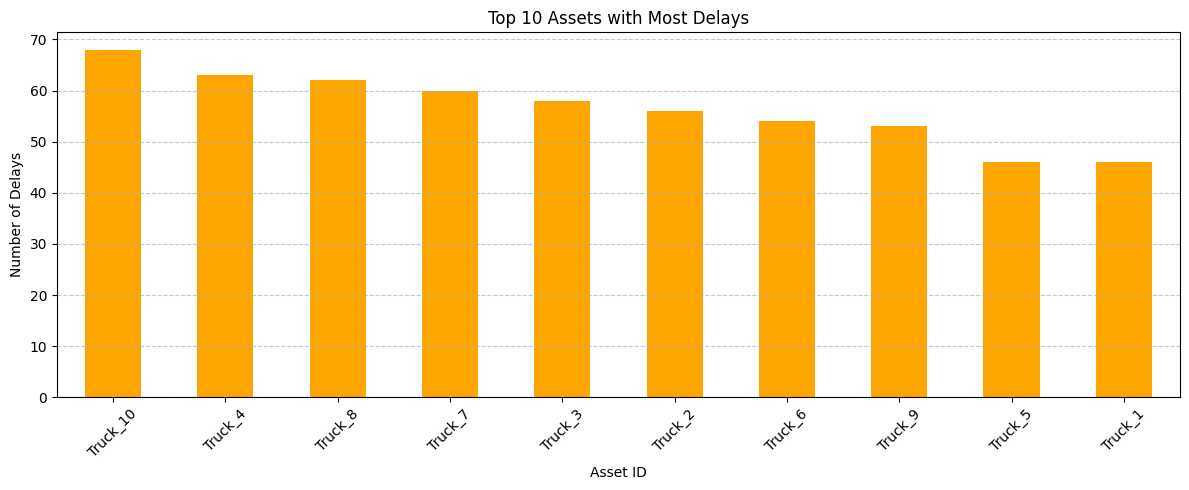

In [15]:

top_delays = df[df['Logistics_Delay'] == 1]['Asset_ID'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 5))
top_delays.plot(kind='bar', color='orange')
plt.title('Top 10 Assets with Most Delays')
plt.xlabel('Asset ID')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Trucks such as Truck_10 and Truck_4 appear most frequently with delays which indicates potential underperformance or high-risk routes

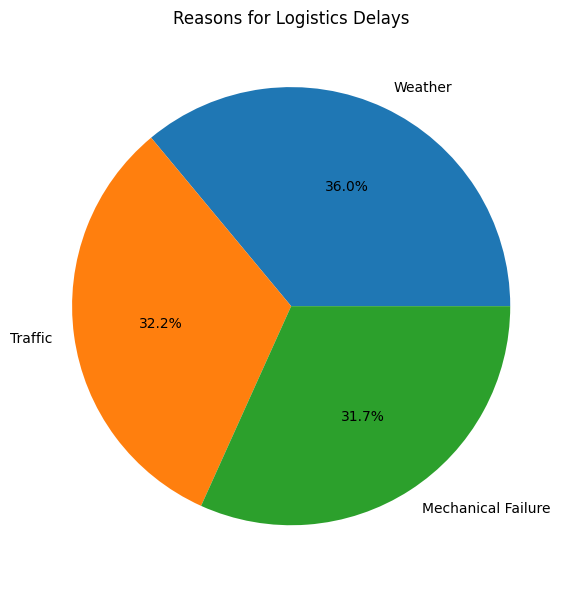

In [16]:
#Logistics Delay Reason
reasons = df[df['Logistics_Delay'] == 1]['Logistics_Delay_Reason'].value_counts()
reasons.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Reasons for Logistics Delays')
plt.ylabel('')
plt.tight_layout()
plt.show()


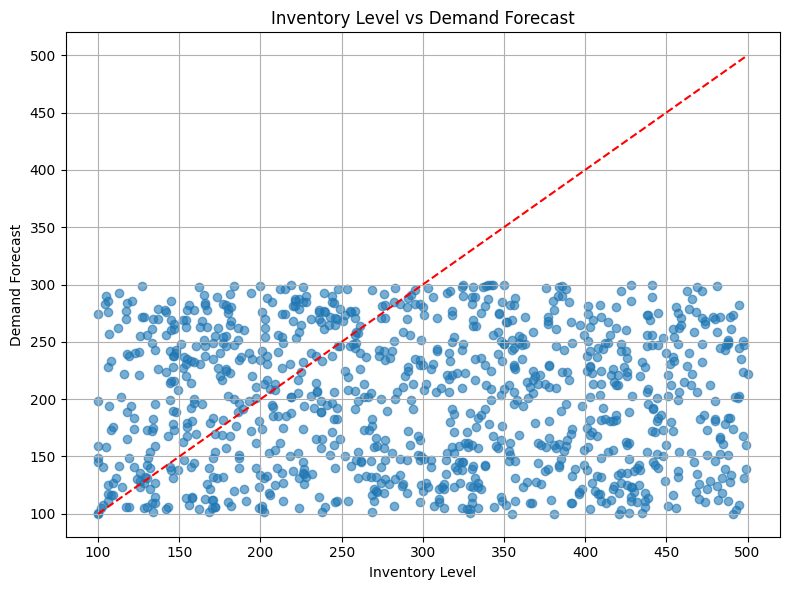

In [17]:
#Inventory vs Demand
plt.figure(figsize=(8, 6))
plt.scatter(df['Inventory_Level'], df['Demand_Forecast'], alpha=0.6)
plt.plot([df['Inventory_Level'].min(), df['Inventory_Level'].max()],
         [df['Inventory_Level'].min(), df['Inventory_Level'].max()], color='red', linestyle='--')
plt.title('Inventory Level vs Demand Forecast')
plt.xlabel('Inventory Level')
plt.ylabel('Demand Forecast')
plt.grid(True)
plt.tight_layout()
plt.show()


Dots far from red line indicate over or understocked assets.

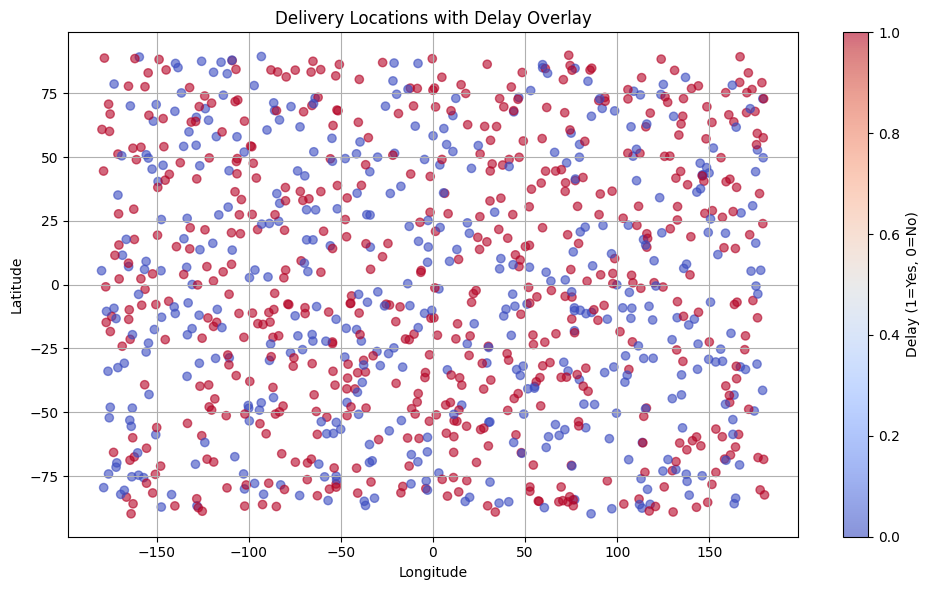

In [18]:
#Delivery Location Delay
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Logistics_Delay'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Delay (1=Yes, 0=No)')
plt.title('Delivery Locations with Delay Overlay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Red zones: delivery problem hotspots.

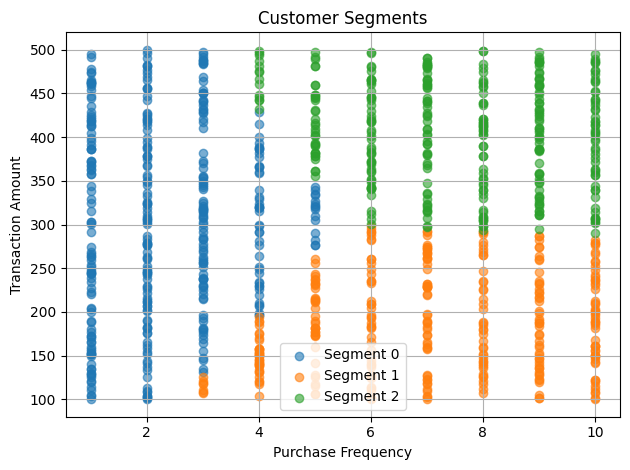

In [19]:
#Customer segmentation

X = df[['User_Purchase_Frequency', 'User_Transaction_Amount']]
scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled)
df['Customer_Segment'] = kmeans.labels_

for i in range(3):
    seg = df[df['Customer_Segment'] == i]
    plt.scatter(seg['User_Purchase_Frequency'], seg['User_Transaction_Amount'], label=f'Segment {i}', alpha=0.6)

plt.xlabel('Purchase Frequency')
plt.ylabel('Transaction Amount')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Classifies customers into spending/frequency groups for targeting.

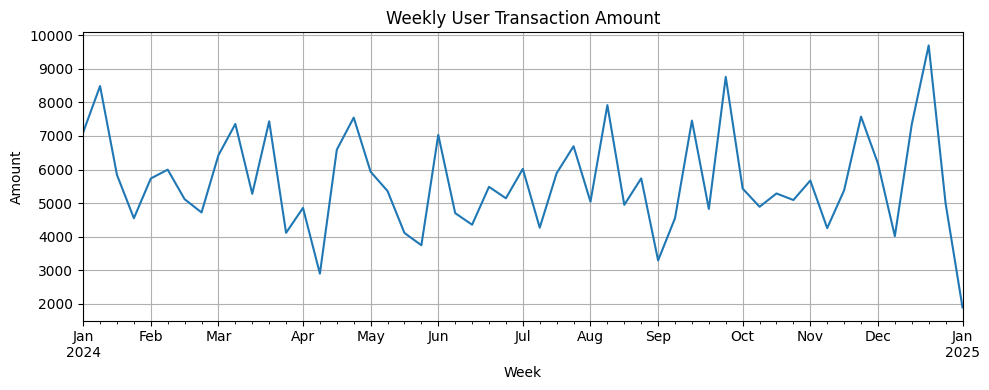

In [20]:
#Weekly Transaction Trend
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
trend = df.set_index('Timestamp').resample('W')['User_Transaction_Amount'].sum()

trend.plot(figsize=(10, 4))
plt.title('Weekly User Transaction Amount')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


Reveals demand spikes and seasonality patterns for the year 2024

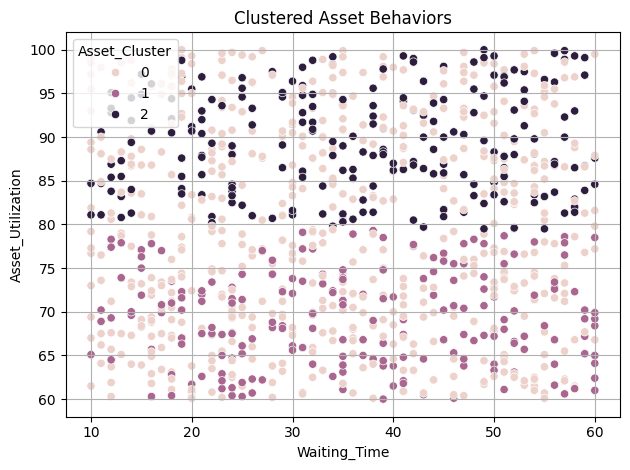

In [21]:
import seaborn as sns

asset_data = df[['Waiting_Time', 'Asset_Utilization', 'Logistics_Delay']]
scaled_asset = StandardScaler().fit_transform(asset_data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled_asset)
df['Asset_Cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='Waiting_Time', y='Asset_Utilization', hue='Asset_Cluster')
plt.title('Clustered Asset Behaviors')
plt.grid(True)
plt.tight_layout()
plt.show()
